In [14]:
#Clean data
import pandas as pd

df = pd.read_excel("~/Desktop/Research/LMU_Wellness/data/Wellness_Database_May19.xlsx", sheet_name="Wellness Responses")

df = df.dropna(subset=["How well did you hydrate?"])

sore_areas = ["Neck", "Back", "Shoulders", "Chest", "Arms", "Hip Flexors", "Glutes", "Hamstrings", "Quadricps", "Adductors", "Calves", "Feet"]

columns_to_drop = ['Timestamp', 'Athlete ID #', 'Data ID', 'Week ID', 'Week ID Refined', 'Date Value', 'Year ID', 'Season ID', 'Injury Refined', 'Position', 'Classification', 'Stress RA', 'Stress StdDev', 'Stress Z-Score', 'Stress Wellness Score', 'Sleep Quality RA', 'Sleep Quality StdDev', 'Sleep Quality Z-Score', 'Sleep Quality Wellness Score', 'Sleep Quantity RA', 'Sleep Quantity StdDev', 'Sleep Quantity Z-Score', 'Sleep Quantity Wellness Score', 'Soreness RA', 'Soreness StdDev', 'Soreness Z-Score', 'Soreness Wellness Score', 'Hydrate RA', 'Hydrate StdDev', 'Hydrate Z-Score', 'Hydrate Wellness Score', 'Fuel RA', 'Fuel StdDev', 'Fuel Z-Score', 'Fuel Wellness Score', 'Readiness Score']
df = df.drop(columns_to_drop, axis=1)

df['No Injury'] = ((df['What is your injury status?'] == 'Full = I have no injury').astype(int))*10
df['Some Injury'] = ((df['What is your injury status?'] == 'Limited = I need a modification during lift / practice').astype(int))*10
df['Injury'] = ((df['What is your injury status?'] == 'Out = I have an injury').astype(int))*10

# Drop the original column
df = df.drop('What is your injury status?', axis=1)
df = df.rename(columns={"Athlete Name": "AthleteName"})

In [15]:
#Remove outliers
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# Prepare the data
X = df.drop(["What is your readiness score? ", "AthleteName", "Select where you are sore:"], axis=1)  # Features
y = df["What is your readiness score? "]  # Target variable

# Add a constant term to the features
X = sm.add_constant(X)

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X)
results = model.fit()

# Compute leverage values
leverage = OLSInfluence(results).hat_matrix_diag

# Compute Cook's distance
cooks_d = OLSInfluence(results).cooks_distance[0]

# Set a threshold for identifying influential points
threshold = 4 / len(X)  # You can adjust the threshold as needed

# Identify influential points based on Cook's distance and leverage
influential_points = np.where((cooks_d > threshold) | (leverage > np.mean(leverage) + 2 * np.std(leverage)))

# Remove values
for i in range(len(influential_points[0])):
    df = df.drop(index = (influential_points[0][i]+1061) ) 

/Users/gbutts/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [3]:
athletes = {'Kailey Park': 47, 'Makiya Christensen': 46, 'Megan Tinsley': 43, 'Alice Santen': 41, 'Gabriella Marchal': 35, 'Ellie Sommers': 32, 'Bella Beltran': 31, 'Ellen Loncar': 26, 'Genevieve Watkins': 26, 'Amber McCorkle': 26, 'Sophia Pearlmann': 25, 'Kelsey Wong': 24, 'Megan Rucker': 22, 'Madison Werner': 21, 'Jennessa Groves': 21, 'Madison Thomas': 12, 'Abby Lynch': 9}

athlete_data = []

for athlete in athletes:
    athlete_data.append(df[df.AthleteName == athlete])

In [4]:
df.columns

Index(['AthleteName', 'How stressed are you?', 'How well did you sleep?',
       'How many hours did you sleep?', 'Select where you are sore:',
       'How sore are you?', 'How well did you hydrate?',
       'How well did you fuel?', 'What is your readiness score? ', 'No Injury',
       'Some Injury', 'Injury'],
      dtype='object')

In [5]:
variables = ['AthleteName', 'How stressed are you?', 'How well did you sleep?',
       'How many hours did you sleep?', 'How sore are you?',
       'How well did you hydrate?', 'How well did you fuel?',
       'What is your readiness score? ']

print("Total averages")
print("")
for variable in variables:
    if variable != 'AthleteName':
        print("   ", variable)
        print("     ", df[variable].mean())
        
print("----------------------")
print("Athlete averages")
print("")
for dataframe in athlete_data:
    for variable in variables:
        if variable == 'AthleteName':
            print(dataframe[variable].min())
        else:
            print("   ", variable)
            print("     ", dataframe[variable].mean())
    print("")

Total averages

    How stressed are you?
      7.5292841648590025
    How well did you sleep?
      7.531453362255966
    How many hours did you sleep?
      7.663774403470716
    How sore are you?
      6.3383947939262475
    How well did you hydrate?
      7.620390455531453
    How well did you fuel?
      8.056399132321042
    What is your readiness score? 
      80.91323210412148
----------------------
Athlete averages

Kailey Park
    How stressed are you?
      8.391304347826088
    How well did you sleep?
      8.108695652173912
    How many hours did you sleep?
      8.08695652173913
    How sore are you?
      6.695652173913044
    How well did you hydrate?
      8.08695652173913
    How well did you fuel?
      8.391304347826088
    What is your readiness score? 
      80.71739130434783

Makiya Christensen
    How stressed are you?
      6.630434782608695
    How well did you sleep?
      7.695652173913044
    How many hours did you sleep?
      8.26086956521739
    How sore

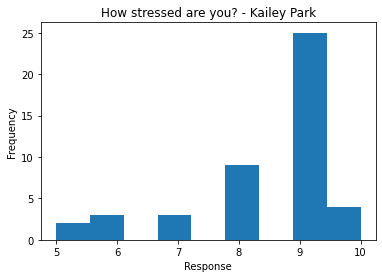

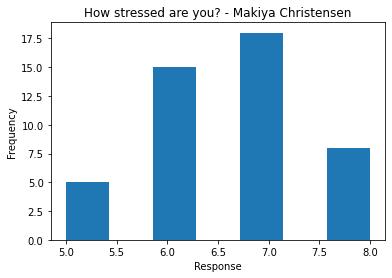

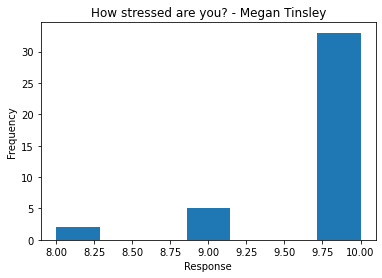

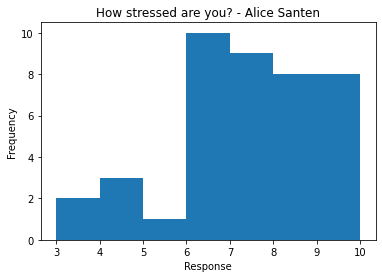

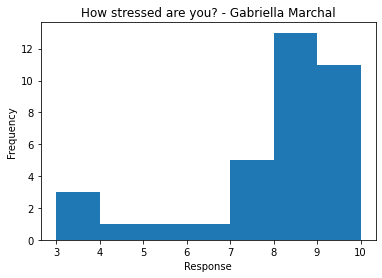

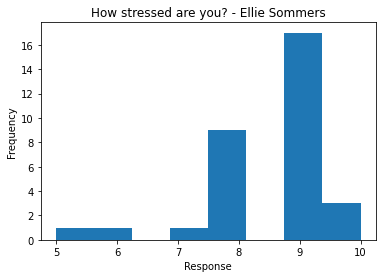

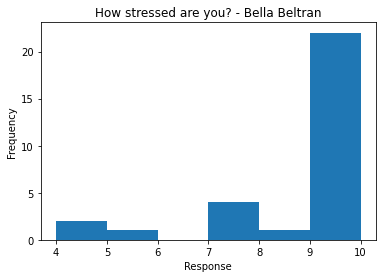

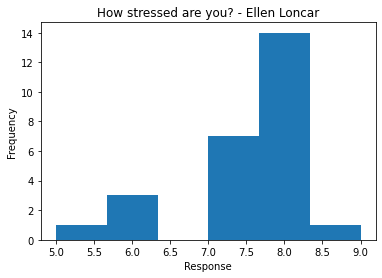

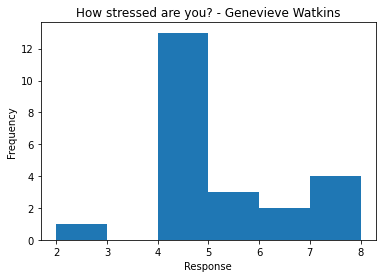

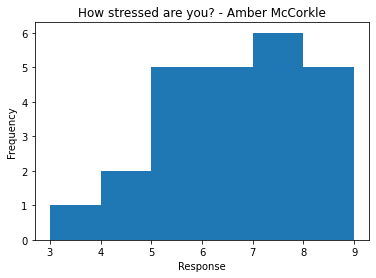

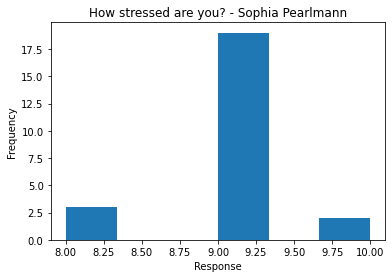

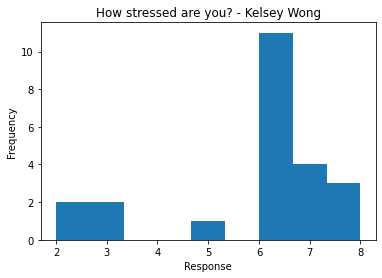

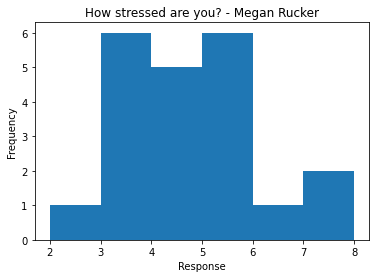

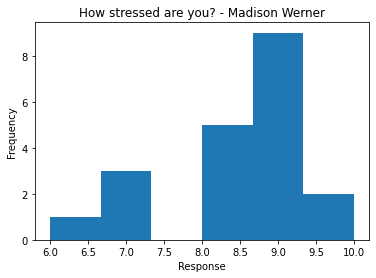

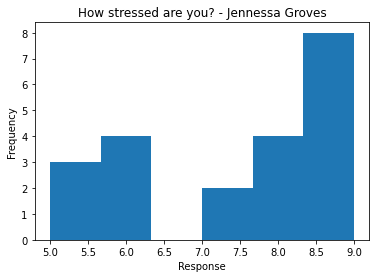

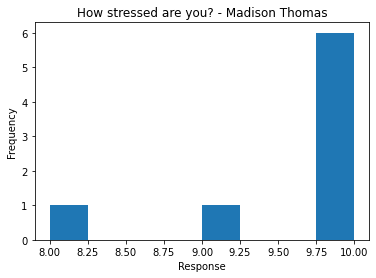

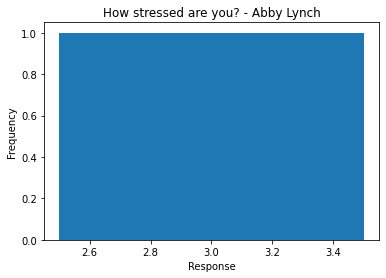

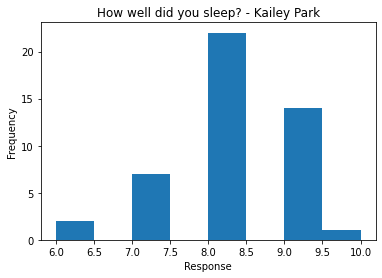

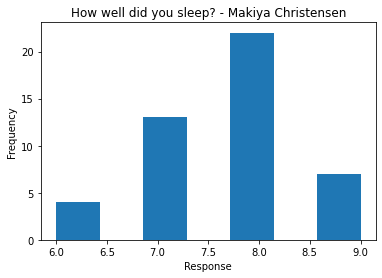

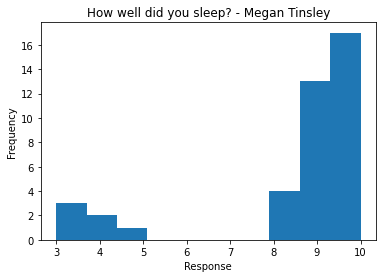

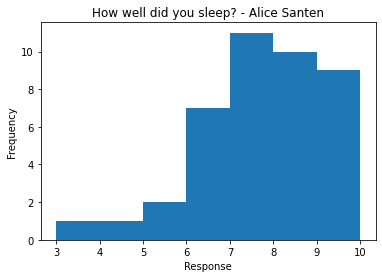

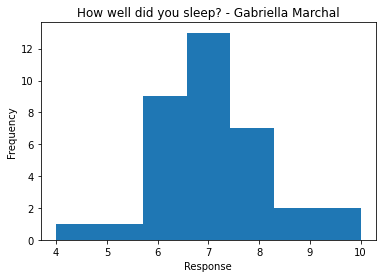

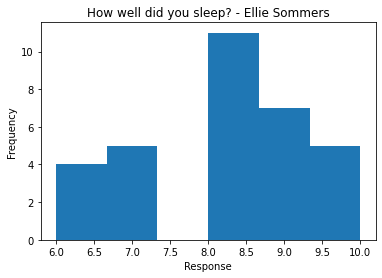

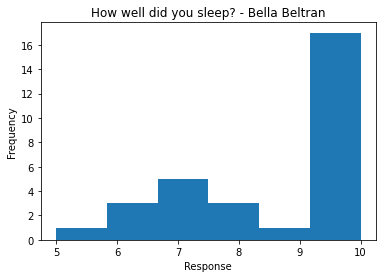

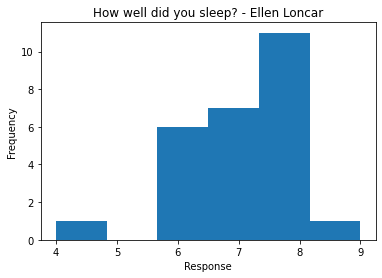

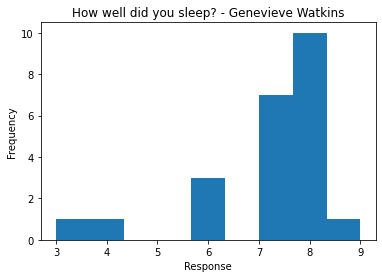

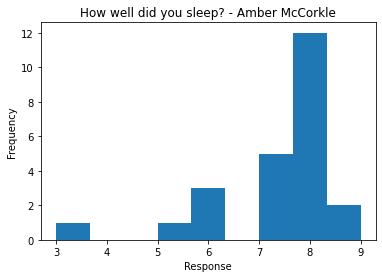

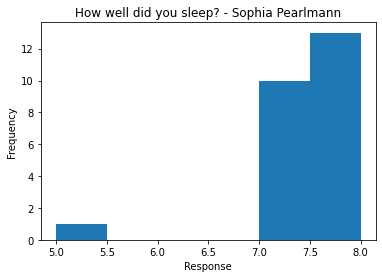

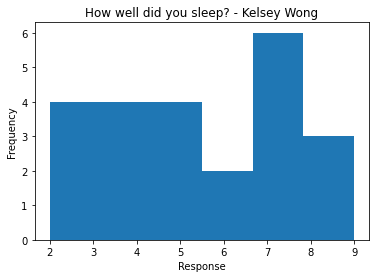

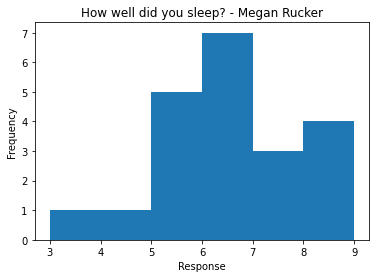

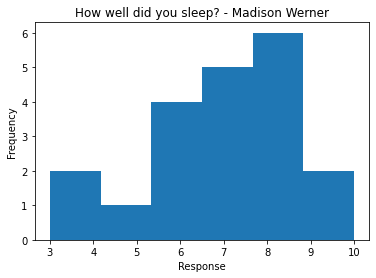

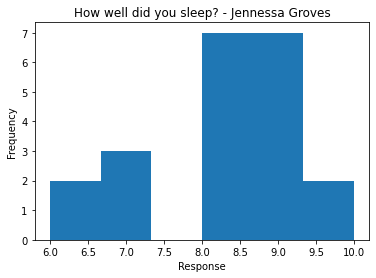

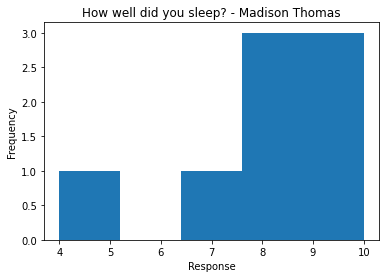

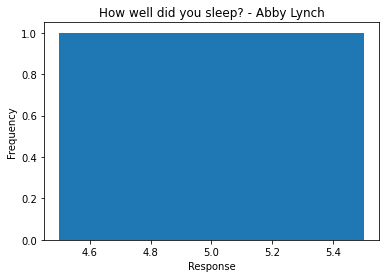

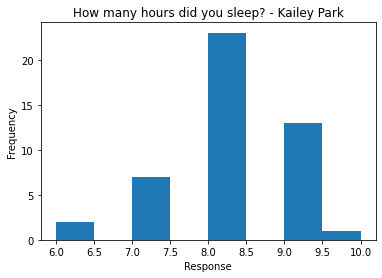

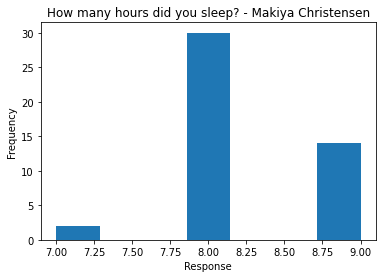

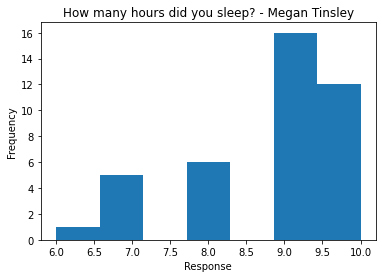

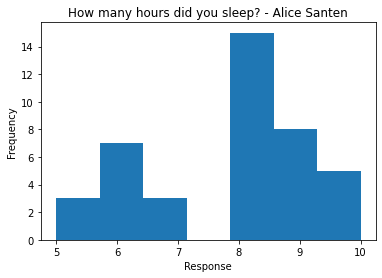

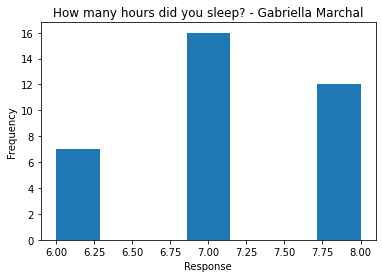

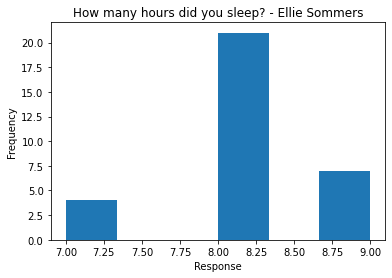

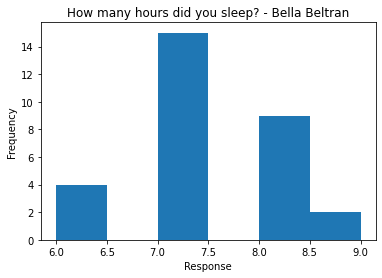

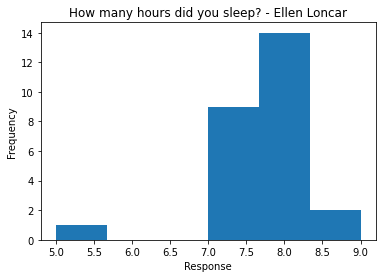

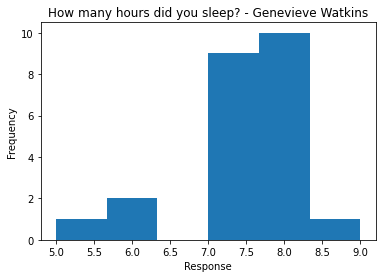

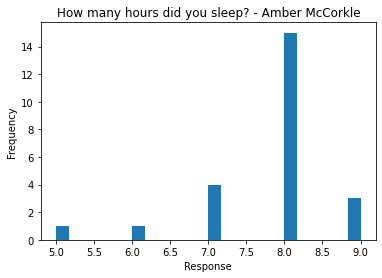

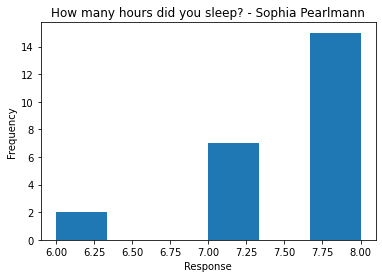

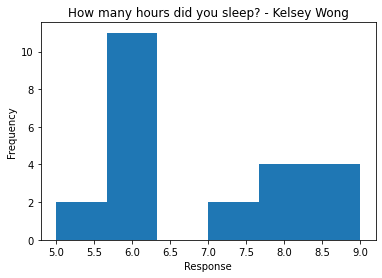

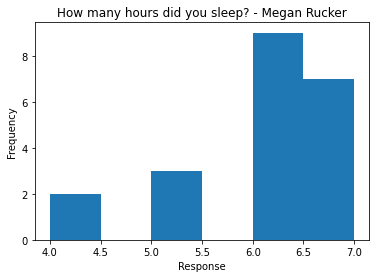

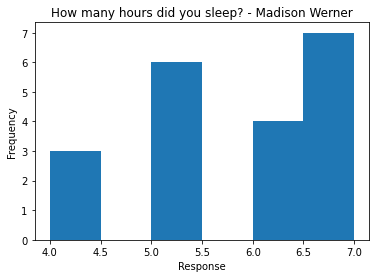

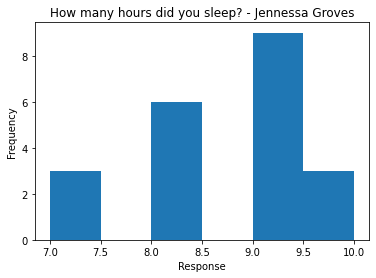

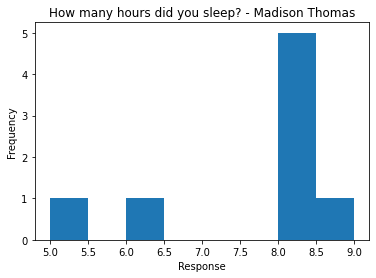

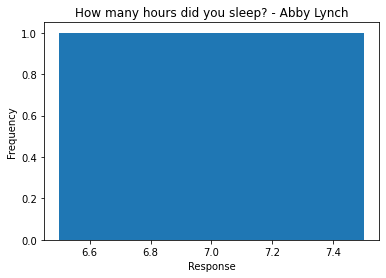

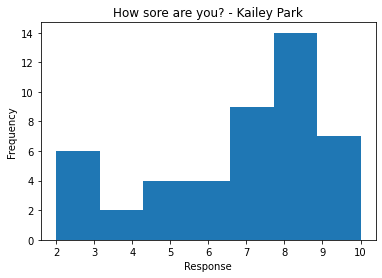

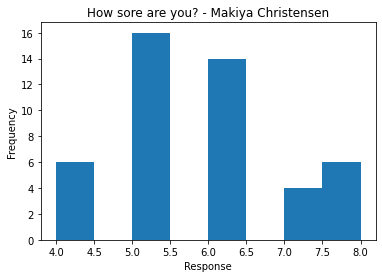

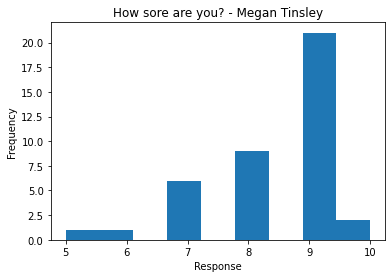

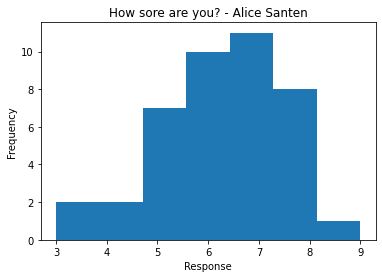

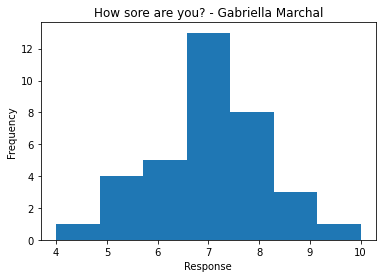

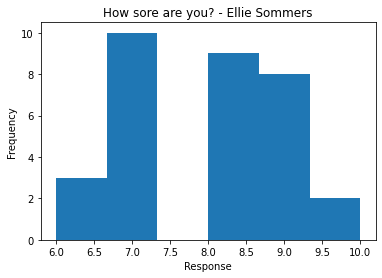

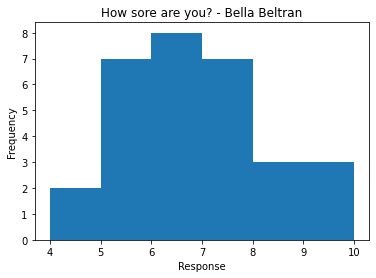

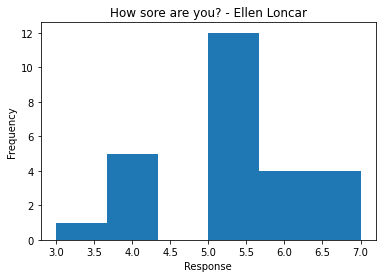

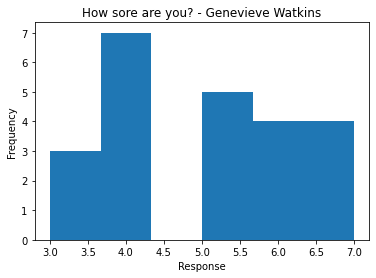

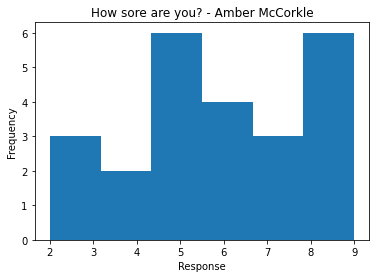

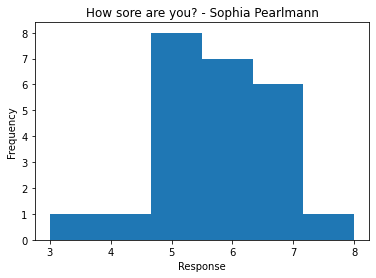

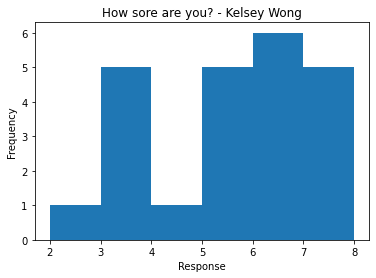

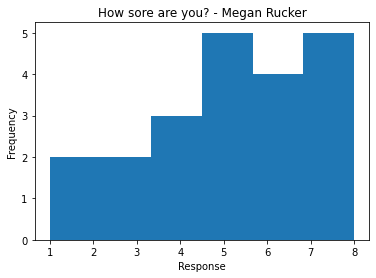

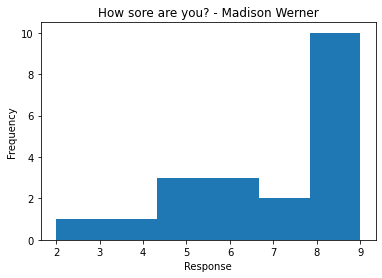

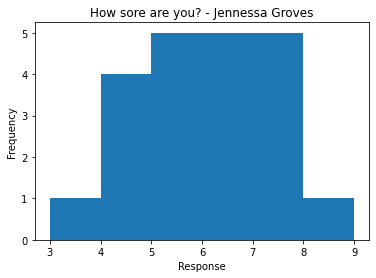

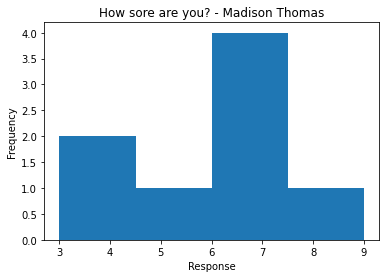

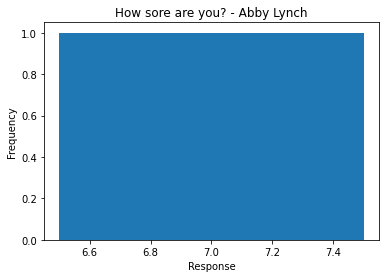

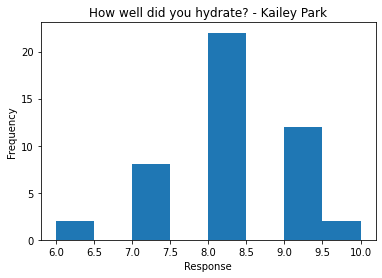

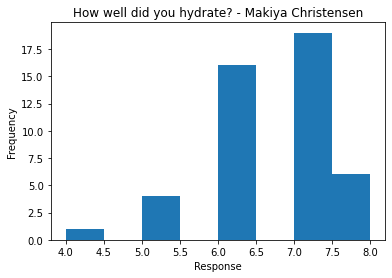

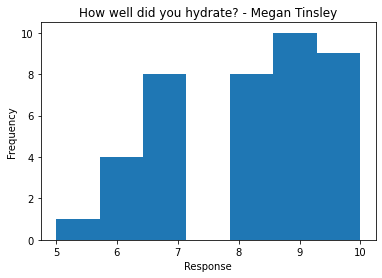

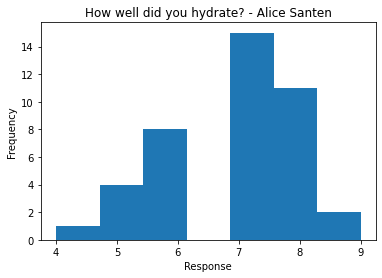

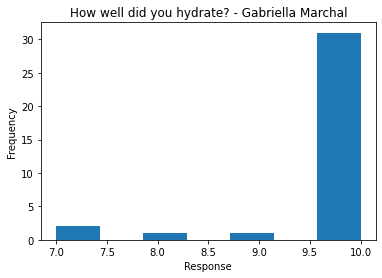

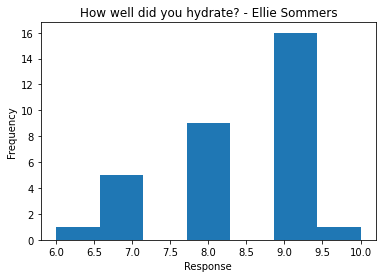

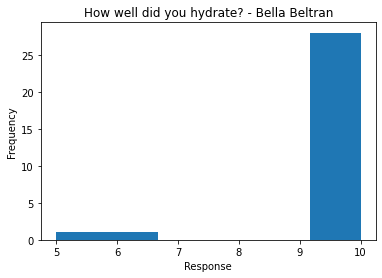

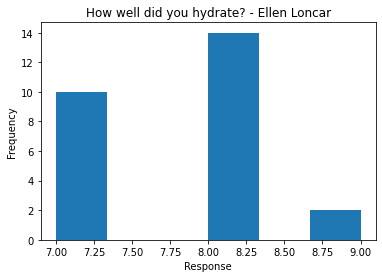

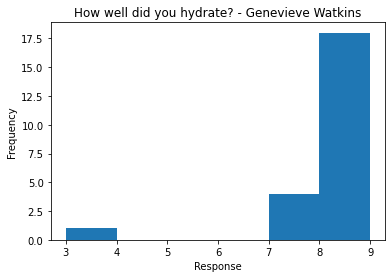

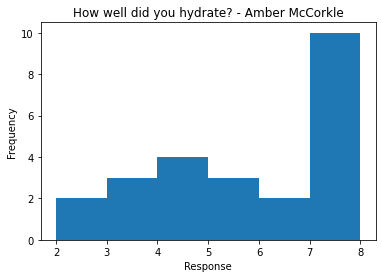

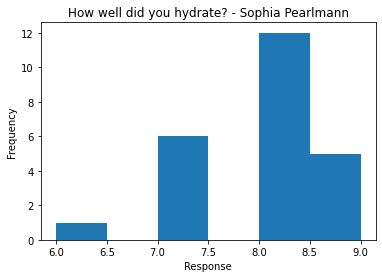

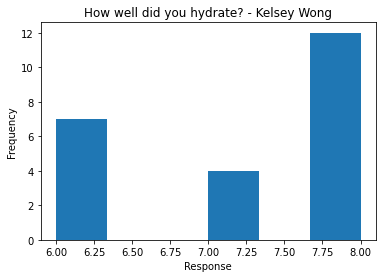

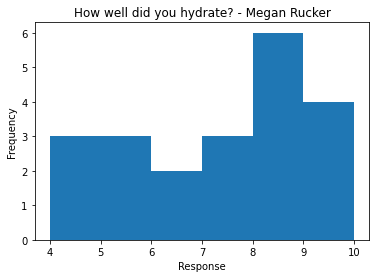

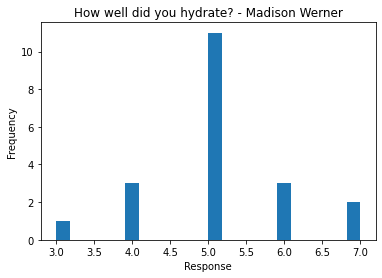

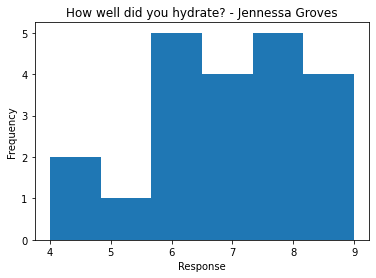

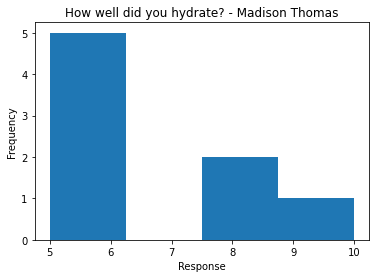

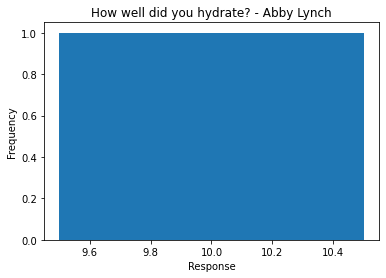

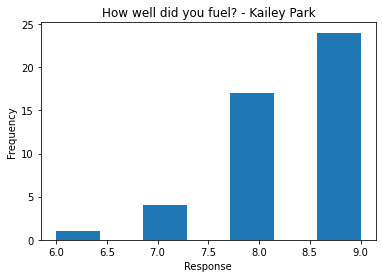

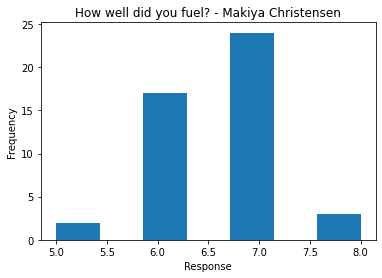

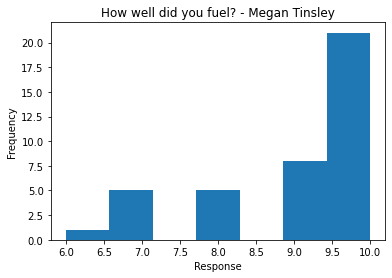

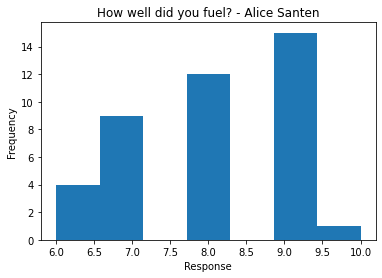

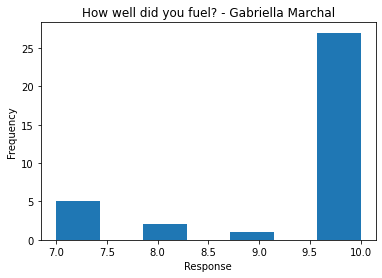

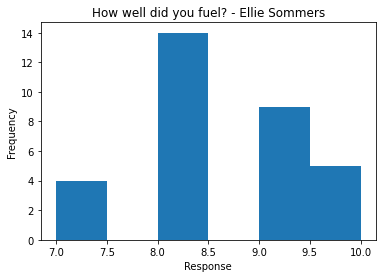

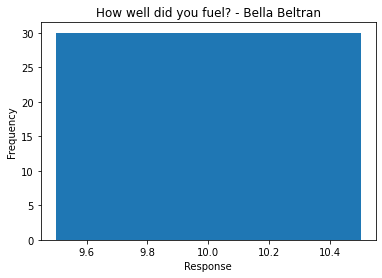

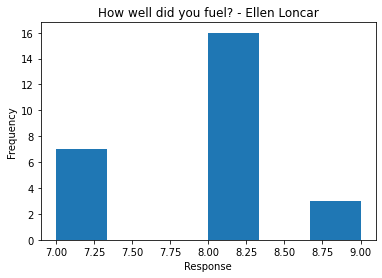

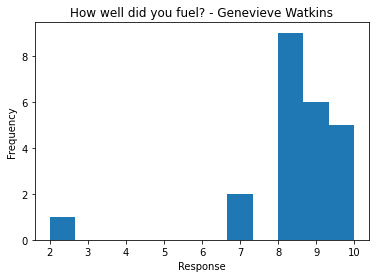

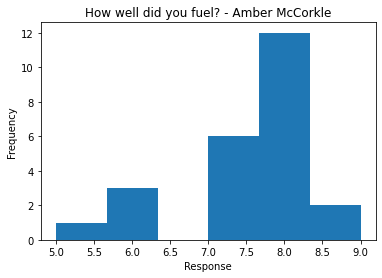

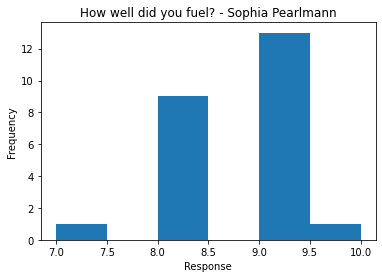

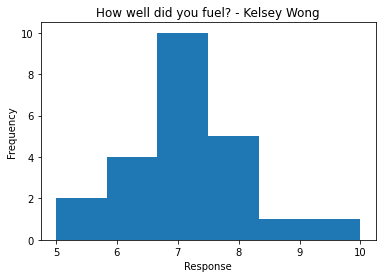

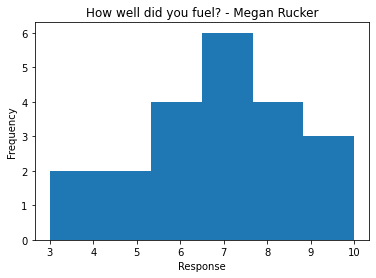

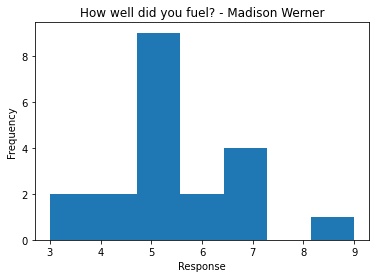

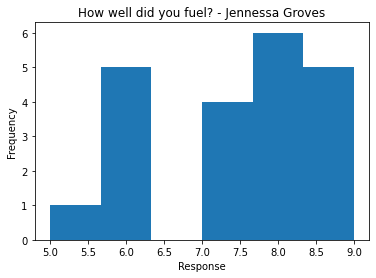

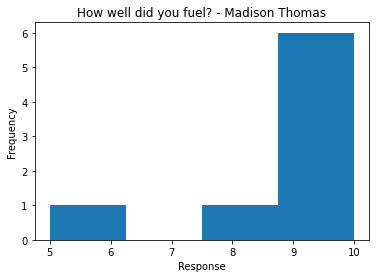

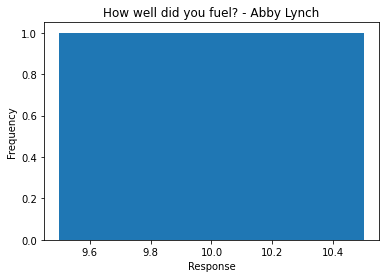

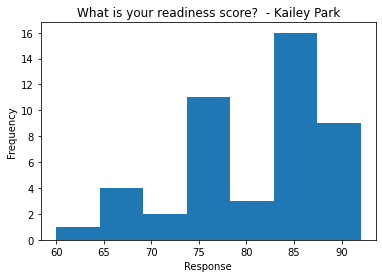

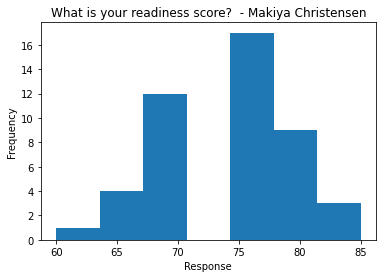

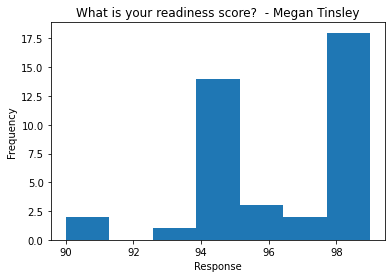

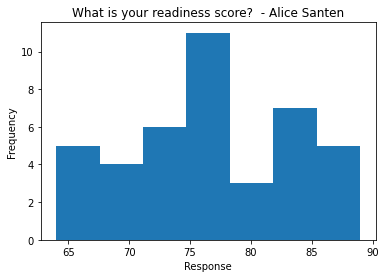

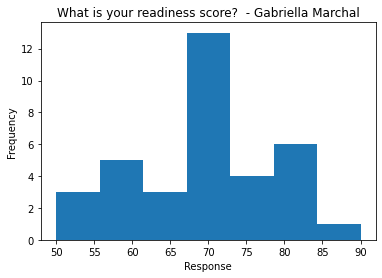

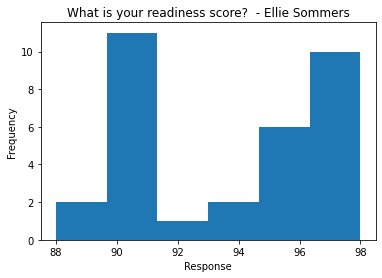

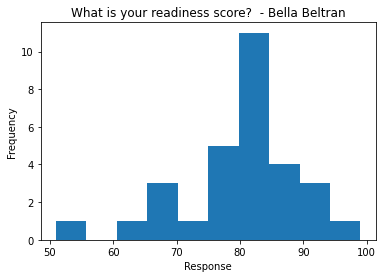

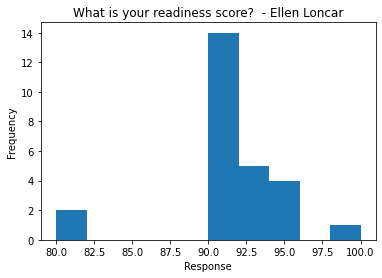

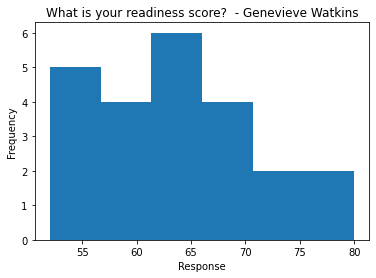

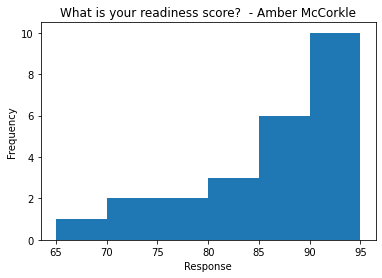

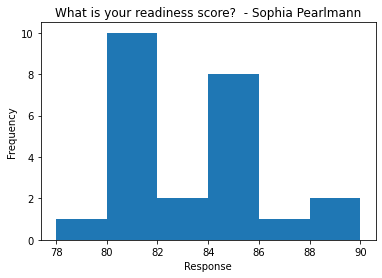

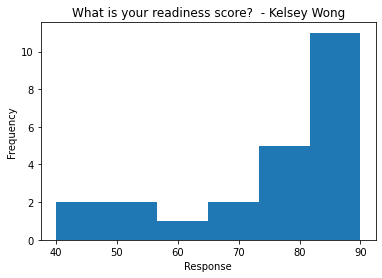

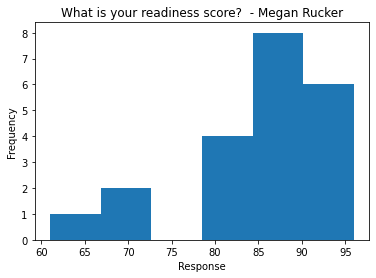

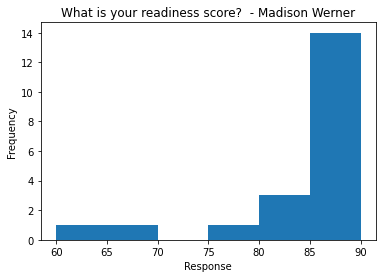

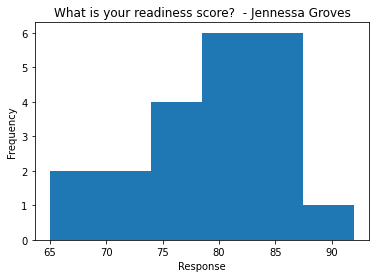

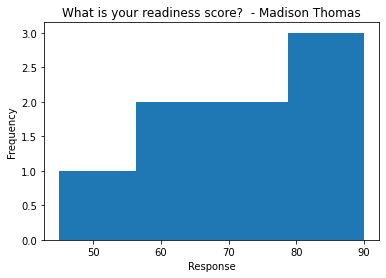

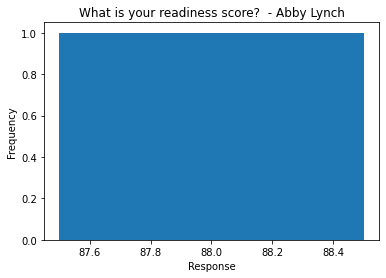

In [6]:
import matplotlib.pyplot as plt

for variable in variables:
    if variable != 'AthleteName':
        plt.figure()  # Create a new figure for each variable
        for dataframe in athlete_data:
            athlete_name = dataframe['AthleteName'].min()
            plt.hist(dataframe[variable], bins='auto')
            plt.title(f"{variable} - {athlete_name}")  # Set the title of the plot as the variable name
            plt.xlabel('Response')  # Set the x-label
            plt.ylabel('Frequency')  # Set the y-label
            plt.show()  # Show the plot for the variable


In [7]:
#Scaling transformation
import pandas as pd
import numpy as np

# Compute global averages
global_averages = df[['How stressed are you?', 'How well did you sleep?', 'How sore are you?',
                      'How well did you hydrate?', 'How well did you fuel?',
                      'What is your readiness score? ']].mean()

# Apply linear transformation
for athlete_name in df['AthleteName'].unique():
    athlete_mask = df['AthleteName'] == athlete_name
    athlete_averages = df.loc[athlete_mask, ['How stressed are you?', 'How well did you sleep?',
                                             'How sore are you?', 'How well did you hydrate?',
                                             'How well did you fuel?', 'What is your readiness score? ']].mean()
    transformation_factors = global_averages / athlete_averages
    transformed_values = df.loc[athlete_mask, ['How stressed are you?', 'How well did you sleep?',
                                               'How sore are you?', 'How well did you hydrate?',
                                               'How well did you fuel?', 'What is your readiness score? ']] * transformation_factors
    df.loc[athlete_mask, ['How stressed are you?', 'How well did you sleep?',
                          'How sore are you?', 'How well did you hydrate?',
                          'How well did you fuel?', 'What is your readiness score? ']] = transformed_values

# Clip values to the range of 0 to 10
df[['How stressed are you?', 'How well did you sleep?', 'How sore are you?',
    'How well did you hydrate?', 'How well did you fuel?']] = np.clip(df[['How stressed are you?', 'How well did you sleep?',
                                                    'How sore are you?', 'How well did you hydrate?',
                                                    'How well did you fuel?']], 0, 10)

df[['What is your readiness score? ']] = np.clip(df[['What is your readiness score? ']], 0, 100)

for area in sore_areas:
    df[area] = df.apply(lambda row: row["How sore are you?"] / (row["Select where you are sore:"].count(",")+1) if (isinstance(row["Select where you are sore:"], str) and area in row["Select where you are sore:"]) else 0, axis=1)
    
# Drop the original "Select where you are sore:" column
df = df.drop("Select where you are sore:", axis=1)


In [8]:
df

,AthleteName,How stressed are you?,How well did you sleep?,How many hours did you sleep?,How sore are you?,How well did you hydrate?,How well did you fuel?,What is your readiness score?,No Injury,Some Injury,...,Shoulders,Chest,Arms,Hip Flexors,Glutes,Hamstrings,Quadricps,Adductors,Calves,Feet
1061,Makiya Christensen,7.948949,6.850644,9.0,6.626504,6.987468,7.314362,70.947379,0,10,...,0.946643,0.0,0.946643,0.946643,0.00000,0.946643,0.000000,0.946643,0.000000,0.000000
1062,Ellie Sommers,7.942981,8.342533,8.0,7.243880,8.219747,7.610473,77.806380,10,0,...,0.000000,0.0,0.000000,1.810970,1.81097,1.810970,1.810970,0.000000,0.000000,0.000000
1064,Alice Santen,6.544890,9.294670,9.0,5.016876,7.728099,7.049349,79.162644,10,0,...,0.000000,0.0,1.672292,0.000000,0.00000,1.672292,1.672292,0.000000,0.000000,0.000000
1065,Kailey Park,8.075450,8.359307,9.0,4.733217,6.596144,7.680712,86.208658,10,0,...,0.000000,0.0,0.000000,2.366608,0.00000,2.366608,0.000000,0.000000,0.000000,0.000000
1066,Genevieve Watkins,6.240488,8.501763,8.0,5.115196,2.921150,1.930179,82.626559,10,0,...,1.278799,0.0,0.000000,0.000000,0.00000,0.000000,1.278799,1.278799,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,Alice Santen,7.635705,9.294670,8.0,8.027002,6.624085,7.049349,75.996138,10,0,...,0.000000,0.0,0.000000,0.000000,0.00000,4.013501,4.013501,0.000000,0.000000,0.000000
1543,Bella Beltran,8.459870,8.656843,8.0,3.940971,7.856073,8.056399,75.761453,10,0,...,0.000000,0.0,0.000000,1.313657,0.00000,1.313657,1.313657,0.000000,0.000000,0.000000
1544,Gabriella Marchal,9.796466,10.000000,8.0,7.214433,7.821515,8.544666,100.000000,10,0,...,0.000000,0.0,0.000000,0.000000,0.00000,3.607217,0.000000,0.000000,3.607217,0.000000
1545,Makiya Christensen,6.813385,7.829307,9.0,5.522086,9.316624,8.533423,88.411350,10,0,...,0.788869,0.0,0.788869,0.788869,0.00000,0.788869,0.788869,0.000000,0.000000,0.788869


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ['How sore are you?', 'How stressed are you?', 'How well did you sleep?', 'Glutes', 'Hamstrings', 'How many hours did you sleep?', 'Shoulders', 'No Injury']
nonfeatures = list(set(df.columns) - set(features))

best_model = None
best_score = -float('inf')

X = df.drop(nonfeatures, axis=1)  # Features (excluding target variable)
y = df["What is your readiness score? "]  # Target variable

for n in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=n)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict using the model
    y_pred = model.predict(X_test)

    # Calculate score (R^2)
    score = model.score(X_test, y_test)

    # Check if this model performs better than the previous best model
    if score > best_score:
        best_score = score
        best_score_model = model
        best_n = n

In [10]:
print(best_score)
print(best_n)

0.5003483831733102
9088


In [11]:
features = ['How stressed are you?', 'How well did you sleep?', 'How many hours did you sleep?', 'How sore are you?', 'How well did you fuel?', 'Back', 'Shoulders', 'Chest', 'Hip Flexors', 'Glutes', 'Hamstrings', 'Quadricps', 'Calves', 'Feet', 'No Injury']
nonfeatures = list(set(df.columns) - set(features))

best_model = None
best_score = -float('inf')

X = df.drop(nonfeatures, axis=1)  # Features (excluding target variable)
y = df["What is your readiness score? "]  # Target variable

for n in range(100000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = n)
    model.fit(X_train, y_train)
    
    if model.score(X_test, y_test) > best_score:
        best_score = model.score(X_test, y_test)
        best_n = n

In [12]:
print(f"The best score is {best_score} at state {n}")

The best score is 0.5740923610322997 at state 99999


In [16]:
#Linear transformation

import pandas as pd
import numpy as np

# Compute global averages
global_averages = df[['How stressed are you?', 'How well did you sleep?', 'How sore are you?',
                      'How well did you hydrate?', 'How well did you fuel?',
                      'What is your readiness score? ']].mean()

# Compute differences in averages between each athlete and global average
athlete_averages = df.groupby('AthleteName')[['How stressed are you?', 'How well did you sleep?',
                                               'How sore are you?', 'How well did you hydrate?',
                                               'How well did you fuel?', 'What is your readiness score? ']].mean()
differences = global_averages - athlete_averages

# Apply linear transformation based on differences
for athlete_name in df['AthleteName'].unique():
    athlete_mask = df['AthleteName'] == athlete_name
    transformed_values = df.loc[athlete_mask, ['How stressed are you?', 'How well did you sleep?',
                                               'How sore are you?', 'How well did you hydrate?',
                                               'How well did you fuel?', 'What is your readiness score? ']] + differences.loc[athlete_name]
    df.loc[athlete_mask, ['How stressed are you?', 'How well did you sleep?',
                          'How sore are you?', 'How well did you hydrate?',
                          'How well did you fuel?', 'What is your readiness score? ']] = transformed_values

# Clip values to the range of 0 to 10
df[['How stressed are you?', 'How well did you sleep?', 'How sore are you?',
    'How well did you hydrate?', 'How well did you fuel?']] = np.clip(df[['How stressed are you?', 'How well did you sleep?',
                                                    'How sore are you?', 'How well did you hydrate?',
                                                    'How well did you fuel?']], 0, 10)

df[['What is your readiness score? ']] = np.clip(df[['What is your readiness score? ']], 0, 100)

for area in sore_areas:
    df[area] = df.apply(lambda row: row["How sore are you?"] / (row["Select where you are sore:"].count(",")+1) if (isinstance(row["Select where you are sore:"], str) and area in row["Select where you are sore:"]) else 0, axis=1)
    
# Drop the original "Select where you are sore:" column
df = df.drop("Select where you are sore:", axis=1)


In [17]:
df

,AthleteName,How stressed are you?,How well did you sleep?,How many hours did you sleep?,How sore are you?,How well did you hydrate?,How well did you fuel?,What is your readiness score?,No Injury,Some Injury,...,Shoulders,Chest,Arms,Hip Flexors,Glutes,Hamstrings,Quadricps,Adductors,Calves,Feet
1061,Makiya Christensen,7.898849,6.835801,9.0,6.599264,7.076912,7.447703,71.782797,0,10,...,0.942752,0.0,0.942752,0.942752,0.000000,0.942752,0.000000,0.942752,0.000000,0.000000
1062,Ellie Sommers,7.998034,8.406453,8.0,7.463395,8.276640,7.587649,77.319482,10,0,...,0.000000,0.0,0.000000,1.865849,1.865849,1.865849,1.865849,0.000000,0.000000,0.000000
1064,Alice Santen,6.626845,9.238770,9.0,5.021322,7.717951,7.056399,79.254696,10,0,...,0.000000,0.0,1.673774,0.000000,0.000000,1.673774,1.673774,0.000000,0.000000,0.000000
1065,Kailey Park,8.137980,8.422758,9.0,4.642743,6.533434,7.665095,86.195841,10,0,...,0.000000,0.0,0.000000,2.321371,0.000000,2.321371,0.000000,0.000000,0.000000,0.000000
1066,Genevieve Watkins,6.703197,8.444497,8.0,5.381873,2.794303,1.708573,82.261058,10,0,...,1.345468,0.0,0.000000,0.000000,0.000000,0.000000,1.345468,1.345468,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,Alice Santen,7.626845,9.238770,8.0,8.021322,6.717951,7.056399,76.254696,10,0,...,0.000000,0.0,0.000000,0.000000,0.000000,4.010661,4.010661,0.000000,0.000000,0.000000
1543,Bella Beltran,8.629284,8.831453,8.0,3.905061,7.920390,8.056399,75.813232,10,0,...,0.000000,0.0,0.000000,1.301687,0.000000,1.301687,1.301687,0.000000,0.000000,0.000000
1544,Gabriella Marchal,9.843570,10.000000,8.0,7.309823,7.877533,8.627828,100.000000,10,0,...,0.000000,0.0,0.000000,0.000000,0.000000,3.654912,0.000000,0.000000,3.654912,0.000000
1545,Makiya Christensen,6.898849,7.835801,9.0,5.599264,9.076912,8.447703,87.782797,10,0,...,0.799895,0.0,0.799895,0.799895,0.000000,0.799895,0.799895,0.000000,0.000000,0.799895


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ['How sore are you?', 'How stressed are you?', 'How well did you sleep?', 'Glutes', 'Hamstrings', 'How many hours did you sleep?', 'Shoulders', 'No Injury']
nonfeatures = list(set(df.columns) - set(features))

best_model = None
best_score = -float('inf')

X = df.drop(nonfeatures, axis=1)  # Features (excluding target variable)
y = df["What is your readiness score? "]  # Target variable

for n in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=n)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict using the model
    y_pred = model.predict(X_test)

    # Calculate score (R^2)
    score = model.score(X_test, y_test)

    # Check if this model performs better than the previous best model
    if score > best_score:
        best_score = score
        best_score_model = model
        best_n = n

In [21]:
print(best_score)
print(best_n)

0.4747542197403646
9605


In [22]:
features = ['How stressed are you?', 'How well did you sleep?', 'How many hours did you sleep?', 'How sore are you?', 'How well did you fuel?', 'Back', 'Shoulders', 'Chest', 'Hip Flexors', 'Glutes', 'Hamstrings', 'Quadricps', 'Calves', 'Feet', 'No Injury']
nonfeatures = list(set(df.columns) - set(features))

best_model = None
best_score = -float('inf')

X = df.drop(nonfeatures, axis=1)  # Features (excluding target variable)
y = df["What is your readiness score? "]  # Target variable

for n in range(100000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = n)
    model.fit(X_train, y_train)
    
    if model.score(X_test, y_test) > best_score:
        best_score = model.score(X_test, y_test)
        best_n = n

In [23]:
print(f"The best score is {best_score} at state {n}")

The best score is 0.5434214914055588 at state 99999
